In [1]:
 # Importing more generic libraries
import glob
import os
import math
import csv
import ast
import collections
from collections import Counter

# Importing data structure libraries
import pandas as pd
import numpy as np

# Import graphing tools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure that any graphs produced appears in the notebook
%matplotlib inline

# Import text analysist tools
import re
import nltk
from nltk.tokenize import RegexpTokenizer
import csv
import pandas as pd

In [2]:
# Save the dataframe into a file
# Parameters:
# data_frame_name = Name of the dataframe to save
# name_of_file    = The name of the file you want to save it as
def save_frame(data_frame_name, name_of_file):
    
    print("Begin saving dataframe into a csv.\n")
    
    name = name_of_file + ".csv"
    # Save the dataframe
    data_frame_name.to_csv(name, sep=',', encoding='utf-8')
    
    print("Finish and saved into " + name + "\n")

# Loads the dataframe from a single file. By default it skips the 1st column (this is usually the index) 
# Parameters:
# csv_file_name   = Name of the file to load
# length          = The amount of columns to load (take the amount of columns + 1)
# custom          = If you want to load in a selective column amount turn true
# colList         = Which columns you want to load
# colNames        = The names of the columns that you want to load
def read_frame(csv_file_name, length=None, custom= False, colList = None, colNames = None):
    print("Reading csv " + csv_file_name)
    name = csv_file_name + ".csv"
    
    # Load csv by specifying which ones you want 
    if custom:
        return_frame = pd.read_csv(name,  usecols = colList)
    # Load csv by length skipping the first one (index)
    else: 
        return_frame = pd.read_csv(name,  usecols = range(1,length))
    print("Finish reading " + csv_file_name + "\n")
    return return_frame

# Similar to the one before except this converts the list present in the csv back into list objects to be used
# Parameters:
# csv_file_name   = Name of the file to load
# columnNames     = The names of the columns that you want to load
# length          = The amount of columns to load (take the amount of columns + 1)
# custom          = If you want to load in a selective column amount turn true
# colList         = Which columns you want to load
def read_frame_convert_list (csv_file_name, columnNames, length=None, custom= False, colList = None):
    
    # Create the function to convert to a list
    string_to_list = lambda x: ast.literal_eval(str(x))

    # Create the converter that will convert all the columns we tell it to back to a list object
    conv = {}
    
    # Assign the converter for each column to convert
    for entry in columnNames:
        conv[entry] = string_to_list
    
    print("Reading csv " + csv_file_name)
    name = csv_file_name + ".csv"

    # Load a specified amount of columns from the csv
    if custom:
        return_frame = pd.read_csv(name,  usecols = colList,  converters=conv)
    
    # Load the csv based on length
    else: 
        return_frame = pd.read_csv(name,  usecols = range(1,length),  converters=conv)
    print("Finish reading " + csv_file_name + "\n")
    
    return return_frame

In [3]:
# Extract the links from a text
def extract_links(dataframe):
    
    # Regrex to extract all the links
    urls = re.findall(r"http\S+", dataframe['tweet'])
    
    # Replace the link with the placeholder @LINK
    dataframe['tweet'] = re.sub(r"http\S+", "@LINK", dataframe['tweet'])
    
    # Insert the URL into their own column
    if not urls:
        dataframe["URL"] = []
    else: 
        dataframe["URL"] = urls
    return dataframe
    
    
# Extract tweeter mentions in a text
def extract_mentions(dataframe):
    
    # Regrex to extract all the mentions
    mention = re.findall(r"@([A-Za-z0-9_]+)", dataframe['tweet'])
    
    # Replace the mention with the placeholder @MENTION
    dataframe['tweet'] = re.sub(r"@([A-Za-z0-9_]+)", "@MENTION", dataframe['tweet'])
    
    # Insert the mention into their own column
    if not mention:
        dataframe["MENTION"] = []
    else: 
        dataframe["MENTION"] = mention
    return dataframe

# Changes the date the declared format   
def format_date(dataframe, column_name, time_format):
    
    print("Start formatting date ")
    
    # Convert the time to date-time object
    dataframe[column_name] = pd.to_datetime(dataframe[column_name])
    
    # Convert the time to the desired format
    dataframe[column_name] = dataframe[column_name].apply(lambda x: x.strftime(time_format))  
    
    print("Finish formatting date \n") 
    
    return dataframe

In [19]:
# Start inital setup
MasterTweetFrame = pd.DataFrame(pd.read_csv('tweets_cleaned.csv'), columns=['date','name','tweet'])

In [41]:
print("Start extracting Mentions\n")

# Extract the mentions
MasterTweetFrame = MasterTweetFrame.apply(extract_mentions, axis=1)

print("End extracting Mentions\n")
print("Start extracting URL\n")

# Extract the URLS
MasterTweetFrame = MasterTweetFrame.apply(extract_links, axis=1)

print("End Extracting URL\n")

# Format the date to use have year, month, day
MasterTweetFrame = format_date(MasterTweetFrame, "date", "%Y-%m-%d")

Start extracting Mentions

End extracting Mentions

Start extracting URL

End Extracting URL

Start formatting date 
Finish formatting date 



In [42]:
# first 5 entries of MasterTweetFrame
MasterTweetFrame[:5]

,date,name,tweet,MENTION,URL
0,2020-01-05,theAlex üá∫üá∏,"@MENTION is a savage. "" ""people survived by ac...","[MENTION, MENTION, MENTION, MENTION]",[]
1,2020-01-05,CougMan ‚≠êÔ∏è‚≠êÔ∏è‚≠êÔ∏è,@MENTION left this gem out of their list(Truth...,[MENTION],[]
2,2020-01-05,wave3news,More than two years after a wave of sexual ass...,[LINK],[]
3,2020-01-05,KOMO News,More than two years after a wave of sexual ass...,[LINK],[]
4,2020-01-05,KSL,More than two years after a wave of sexual ass...,[LINK],[]


In [43]:
# Plot a column value over time 
# Parameters:
# column        = Columns to be used for the data
# date          = The index with the dates
# dataframe     = The dataframe of the data
# intervalValue = Set intervals for date, larger the number the bigger the interval between date stamp on graph
# saveImage     = True to save image, false to skip
# fileName      = Name of the save file
def basic_plot_generator(column, date, dataframe, saveImage=False, fileName = None):
    # Plot how many tweets there are over the whole duration
    fig,ax = plt.subplots()

    # Set title for the graph
    fig.suptitle("#metoo Movement " + column + " Over Time", fontsize="x-large")

    # Create subplot of Tweet Count over time using a the default 1 month interval
    ax.plot(pd.to_datetime(date), dataframe[column], label=column)

    
    # Set the date format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    
    # Calculate the average
    countMean = [dataframe[column].mean()]*len(pd.to_datetime(date))
    mean_line = ax.plot(pd.to_datetime(date),countMean, label='Average Overall Count', linestyle='--')

    # Create a legend for the subplot
    legend = ax.legend(loc='upper center', shadow=True)
    
    # Saving the Plot as an Image
    if saveImage:
        fig.savefig(fileName)
    
    # Show Plot
    plt.show()

# Plot different columns against eachother over time
# Parameters:
# column        = Columns to be used for the data
# date          = The index with the dates
# dataframe     = The dataframe of the data
# intervalValue = Set intervals for date, larger the number the bigger the interval between date stamp on graph
# saveImage     = True to save image, false to skip
# fileName      = Name of the save file
def plot_compare_generator(column, date, dataframe, saveImage=False, fileName = None):
    
    # Plot how many tweets there are over the whole duration
    fig,ax = plt.subplots()

    # Generate Title
    title = "Comparing #metoo Movement Sentiements: "

    # Add all columns to the title
    for element in column:
        title = title + " " + element 
    
    title = title + " Over time"
    
    # Set title for the graph
    fig.suptitle(title, fontsize="x-large")
    
    for element in column:
        # Create subplot of Tweet Count over time using a 3 month interval
        ax.plot(pd.to_datetime(date), dataframe[element], label=element)
        
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    
    # Create a legend for the subplot
    legend = ax.legend(loc='upper center', shadow=True)
    
    # Saving the Plot as an Image
    if saveImage:
        fig.savefig(fileName)
    
    # Show Plot
    plt.show()

## Examining hashtags

## Preprocessing 
1. Tokenizing
2. Removing stopwords

## Defining a preprocess() function

In [70]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

def preprocess(dataframe):
    
    punctuation = set(string.punctuation) # retrieve punctuation set
    use_stopwords = stopwords.words('english')
    lemmatize = WordNetLemmatizer()
    clean_texts = []
    
    # get tweet text 
    textFrame = dataframe['tweet'].copy()
    #preprocessing
    for text in textFrame:
        tok = " ".join(word_tokenize(text))  # tokenize
   
        #remove punctuation
        re_punc = "".join(i for i in tok if i not in punctuation)
    
        #remove stopwords
        re_sw = " ".join([i for i in re_punc.lower().split() if i not in use_stopwords])
    
        #lemmatization
        le = " ".join(lemmatize.lemmatize(i) for i in re_sw.split())
        clean_texts.append(le)
    return clean_texts
    
    

## LDA

In [71]:
from sklearn.feature_extraction.text import CountVectorizer  

# only consider top 1000 vocabulary ordered by 
# term frequency across the entire text corpus
n_features = 1000

#vectorize text
tf_vectorizer = CountVectorizer(min_df = 2,
                                strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english')

# learn vocabulary and return term-document matrix
tf = tf_vectorizer.fit_transform(clean_texts)

In [76]:
from sklearn.decomposition import LatentDirichletAllocation

# set the topic counts
n_topic = 8

lda = LatentDirichletAllocation(n_components = n_topic, 
                                learning_method='online',
                                max_iter=50,
                                random_state=0)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=8, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [77]:
# topic_distribution is a distribution of the topics in each text
topic_distribution = lda.transform(tf)

print(topic_distribution) # not normalized (sum of each row is not 1)

[[0.12659932 0.33333695 0.00735875 ... 0.00735586 0.00735529 0.00735599]
 [0.06931185 0.35063627 0.00694766 ... 0.24692979 0.00694659 0.00694662]
 [0.00595307 0.00595674 0.00595332 ... 0.44874022 0.00595438 0.51552476]
 ...
 [0.01563248 0.0156402  0.01563082 ... 0.01564319 0.89050408 0.01564891]
 [0.00694566 0.00694499 0.00694473 ... 0.95136572 0.00694717 0.00695392]
 [0.00694566 0.00694499 0.00694473 ... 0.95136572 0.00694717 0.00695392]]


In [78]:
def print_top_words(model, feature_names, n_top_words):
    """print top terms in each topic"""
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #{}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

# set the top n words in each topic
n_top_words=20
        
# ngrams featured in the text
tf_feature_names = tf_vectorizer.get_feature_names()

print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
πa metoo told tegen http harveyweinstein van het harvey na proces raped je feminist black een burke ue TM vandaag
Topic #1:
metoo harveyweinstein woman http timesup nt hollywood men sexual survivor like man justice accused au weinsteintrial say victim medium ai
Topic #2:
metoo harveyweinstein think court http walker harveyweinsteintrial using nt rapist accuser outside rosemcgowan day nyc ui news uea need know
Topic #3:
weinstein metoo http harvey trial le judge rape proc new movement case referendum juror york jury du harveyweinstein souvre ua
Topic #4:
weinstein harvey metoo http lawyer movement dangerous trial mean ronan farrow wwwnewyorkercomnewsqandaronanfarrowonwhattheharveyweinsteintrialcouldmeanforthemetoomovement au nt nytims2npqbui utmsourcetwitter rotunno donna utmmediumsocial look
Topic #5:
weinstein http harvey metoo der trial gegen die landmark head sex crime prozess year reckoning und new er beginnt den
Topic #6:
metoo el weinstein harvey http la que en juicio d

In [79]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

/usr/local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.128277 -0.055863       1        1  17.242047
6      0.102082  0.084249       2        1  17.119748
3      0.148680 -0.034499       3        1  15.131677
4      0.120264 -0.026926       4        1  14.797989
1     -0.178298 -0.123028       5        1  14.028018
5      0.148765  0.023408       6        1   8.868544
2     -0.261169 -0.174785       7        1   8.027557
0     -0.208601  0.307444       8        1   4.784419, topic_info=     Category         Freq              Term        Total  loglift  logprob
term                                                                       
943   Default  1858.000000         weinstein  1858.000000  30.0000  30.0000
362   Default   728.000000   harveyweinstein   728.000000  29.0000  29.0000
361   Default  1664.000000            harvey  1664.000000  28.0000  28.0000
249   Default   279.000000                el   279.000000  27.0000  27.0000
957   Default   275.000000             woman   275.000000  26.0000  26.0000
997   Default   148.000000                πa   148.000000  25.0000  25.0000
854   Default   727.000000             trial   727.000000  24.0000  24.0000
839   Default   157.000000             think   157.000000  23.0000  23.0000
477   Default   181.000000            lawyer   181.000000  22.0000  22.0000
687   Default   176.000000               que   176.000000  21.0000  21.0000
252   Default   169.000000                en   169.000000  20.0000  20.0000
572   Default   298.000000               new   298.000000  19.0000  19.0000
188   Default   161.000000             court   161.000000  18.0000  18.0000
439   Default   152.000000            juicio   152.000000  17.0000  17.0000
462   Default   246.000000                la   246.000000  16.0000  16.0000
201   Default   134.000000         dangerous   134.000000  15.0000  15.0000
478   Default   186.000000                le   186.000000  14.0000  14.0000
558   Default   402.000000          movement   402.000000  13.0000  13.0000
845   Default   126.000000           timesup   126.000000  12.0000  12.0000
752   Default   266.000000            sexual   266.000000  11.0000  11.0000
211   Default   123.000000               del   123.000000  10.0000  10.0000
651   Default   116.000000               por   116.000000   9.0000   9.0000
216   Default    81.000000               der    81.000000   8.0000   8.0000
438   Default   106.000000             judge   106.000000   7.0000   7.0000
68    Default   136.000000           assault   136.000000   6.0000   6.0000
585   Default   173.000000                nt   173.000000   5.0000   5.0000
523   Default    97.000000              mean    97.000000   4.0000   4.0000
693   Default   225.000000              rape   225.000000   3.0000   3.0000
148   Default   100.000000            charge   100.000000   2.0000   2.0000
323   Default    68.000000             gegen    68.000000   1.0000   1.0000
...       ...          ...               ...          ...      ...      ...
429    Topic8    18.584055                je    19.434120   2.9951  -4.3644
293    Topic8    18.230007          feminist    19.080692   2.9942  -4.3836
113    Topic8    17.698265             black    18.548666   2.9929  -4.4132
246    Topic8    17.577353               een    18.427370   2.9926  -4.4200
124    Topic8    16.886102             burke    17.736729   2.9907  -4.4602
870    Topic8    16.659007                ue    17.509590   2.9900  -4.4737
9      Topic8    16.130925                TM    16.980895   2.9885  -4.5059
912    Topic8    15.530899           vandaag    16.380886   2.9865  -4.5438
667    Topic8    15.509354           problem    16.359876   2.9864  -4.5452
861    Topic8    15.446235            trying    16.297123   2.9862  -4.5493
468    Topic8    15.103771          lastesis    15.954689   2.9850  -4.5717
611    Topic8    14.512001                op    15.361983   2.9829  -4.61

In [81]:
#Sent
# import textblob for sentiment analysis

from snownlp import SnowNLP
# import a list of pre-defined stopwords
stopwords = [line.strip() for line in open('stopwords.txt', 'r').readlines()]


def sentiment(dataframe):
    
    # 
    SentStatisticFrame = dataframe[['date','tweet']].copy()
    SentStatisticFrame["sent"]=''

    
   
    for row in SentStatisticFrame.iterrows(): 

        #sent = SnowNLP(row[1]['tweet'])
        row_removeST=' '.join([word for word in row[1]['tweet'].split() if word not in stopwords])
        sent = SnowNLP(row_removeST)
        
        if sent.sentiments > 0.9:
            row[1]['sent']= "pos"

        elif sent.sentiments <0.3:
            row[1]['sent']= "neg"

        else:
            row[1]['sent']= "neu"
            
              
    return SentStatisticFrame

In [82]:

sent_dataframe = sentiment(MasterTweetFrame)
sent_day = sent_dataframe.groupby(['date','sent']).size().reset_index(name='Size')

sent_day

,date,sent,Size
0,2020-01-05,neg,7
1,2020-01-05,neu,3
2,2020-01-06,neg,843
3,2020-01-06,neu,246
4,2020-01-06,pos,2
5,2020-01-07,neg,248
6,2020-01-07,neu,57
7,2020-01-07,pos,1
8,2020-01-08,neg,88
9,2020-01-08,neu,37


In [83]:
sent_day_cross = sent_day.pivot_table(index=['date','sent'])
sent_day_cross.pivot_table(index='date',columns='sent')

Size            
sent          neg    neu  pos
date                         
2020-01-05    7.0    3.0  NaN
2020-01-06  843.0  246.0  2.0
2020-01-07  248.0   57.0  1.0
2020-01-08   88.0   37.0  1.0
2020-01-09   60.0   19.0  NaN
2020-01-10   64.0   29.0  2.0
2020-01-11   52.0   24.0  NaN
2020-01-12   37.0    6.0  NaN
2020-01-13   85.0   16.0  1.0
2020-01-14  147.0   28.0  NaN
2020-01-15   74.0   17.0  NaN
2020-01-16   71.0   25.0  2.0
2020-01-17   65.0   16.0  NaN

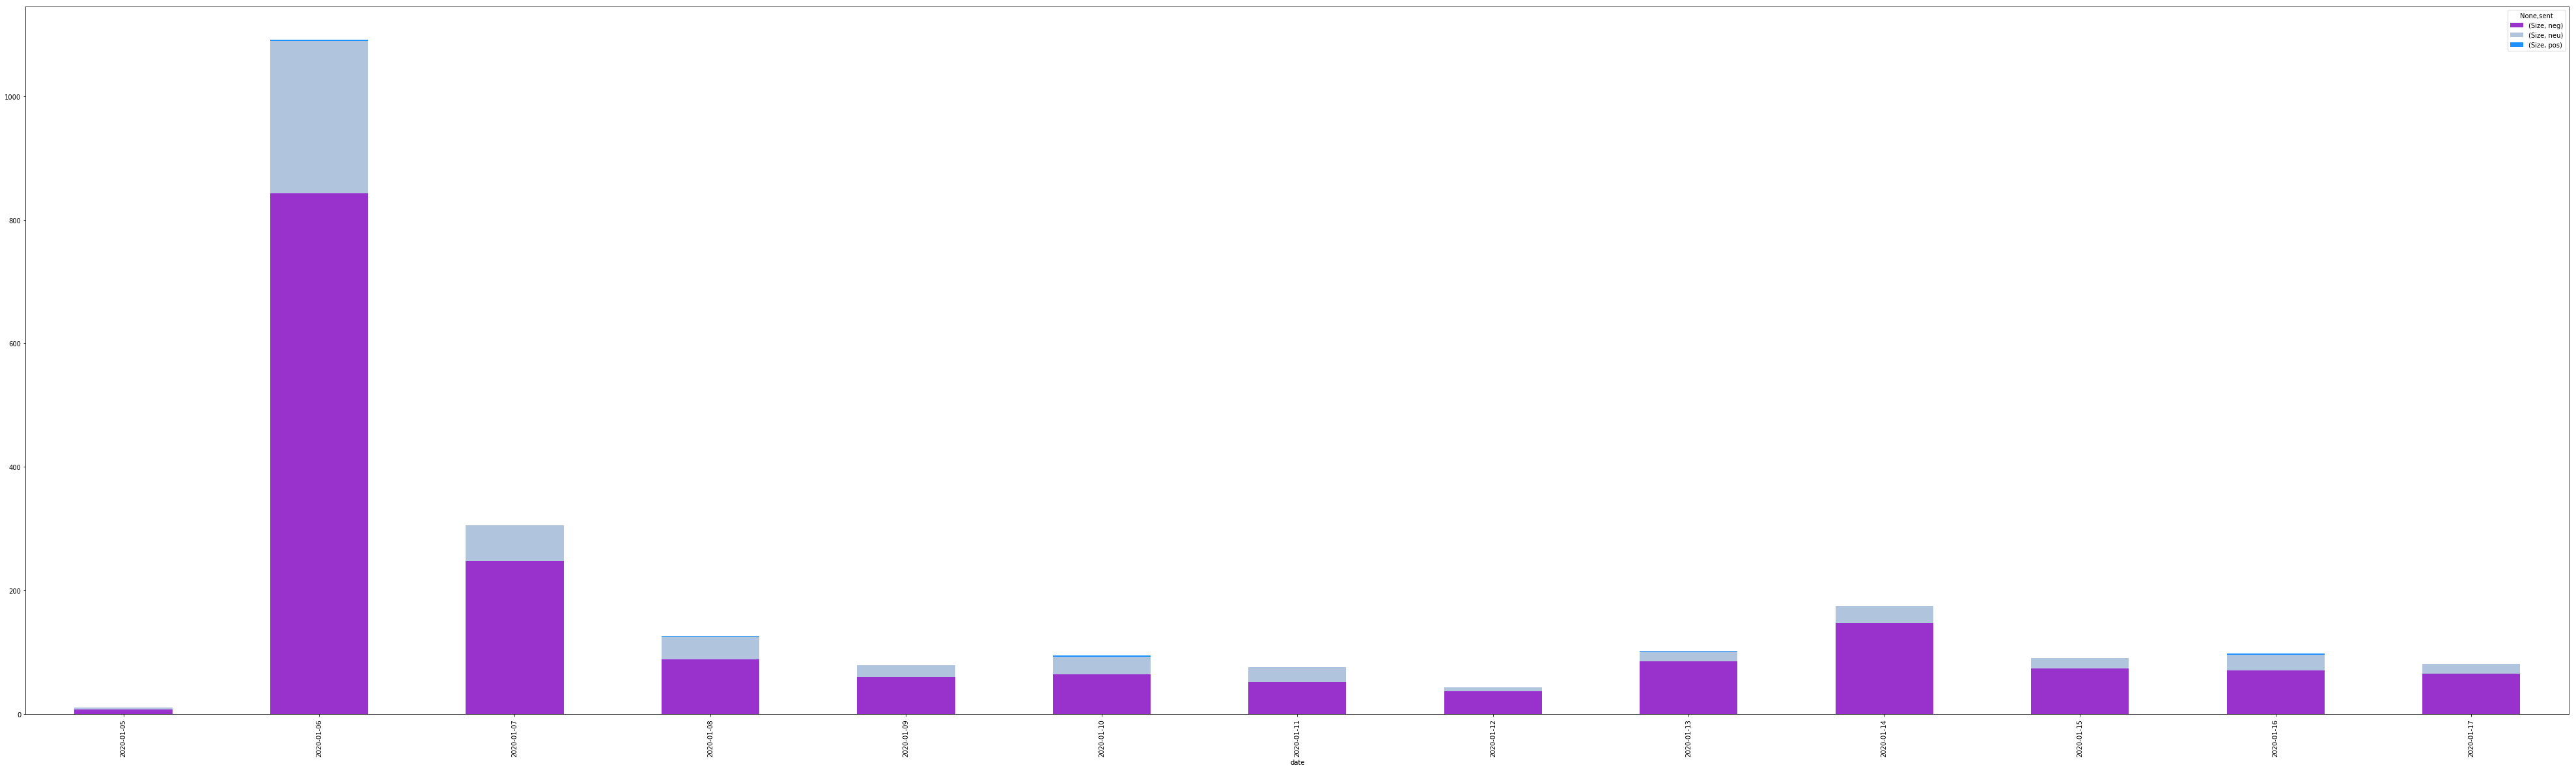

In [84]:
# plot the sentiment table
sent_day_cross.pivot_table(index='date',columns='sent').plot(figsize=(70, 20),kind='bar',color=('darkorchid', 'lightsteelblue', 'dodgerblue'),stacked=True)
plt.savefig('output0.9-0.3_removeST.png', dpi=300)

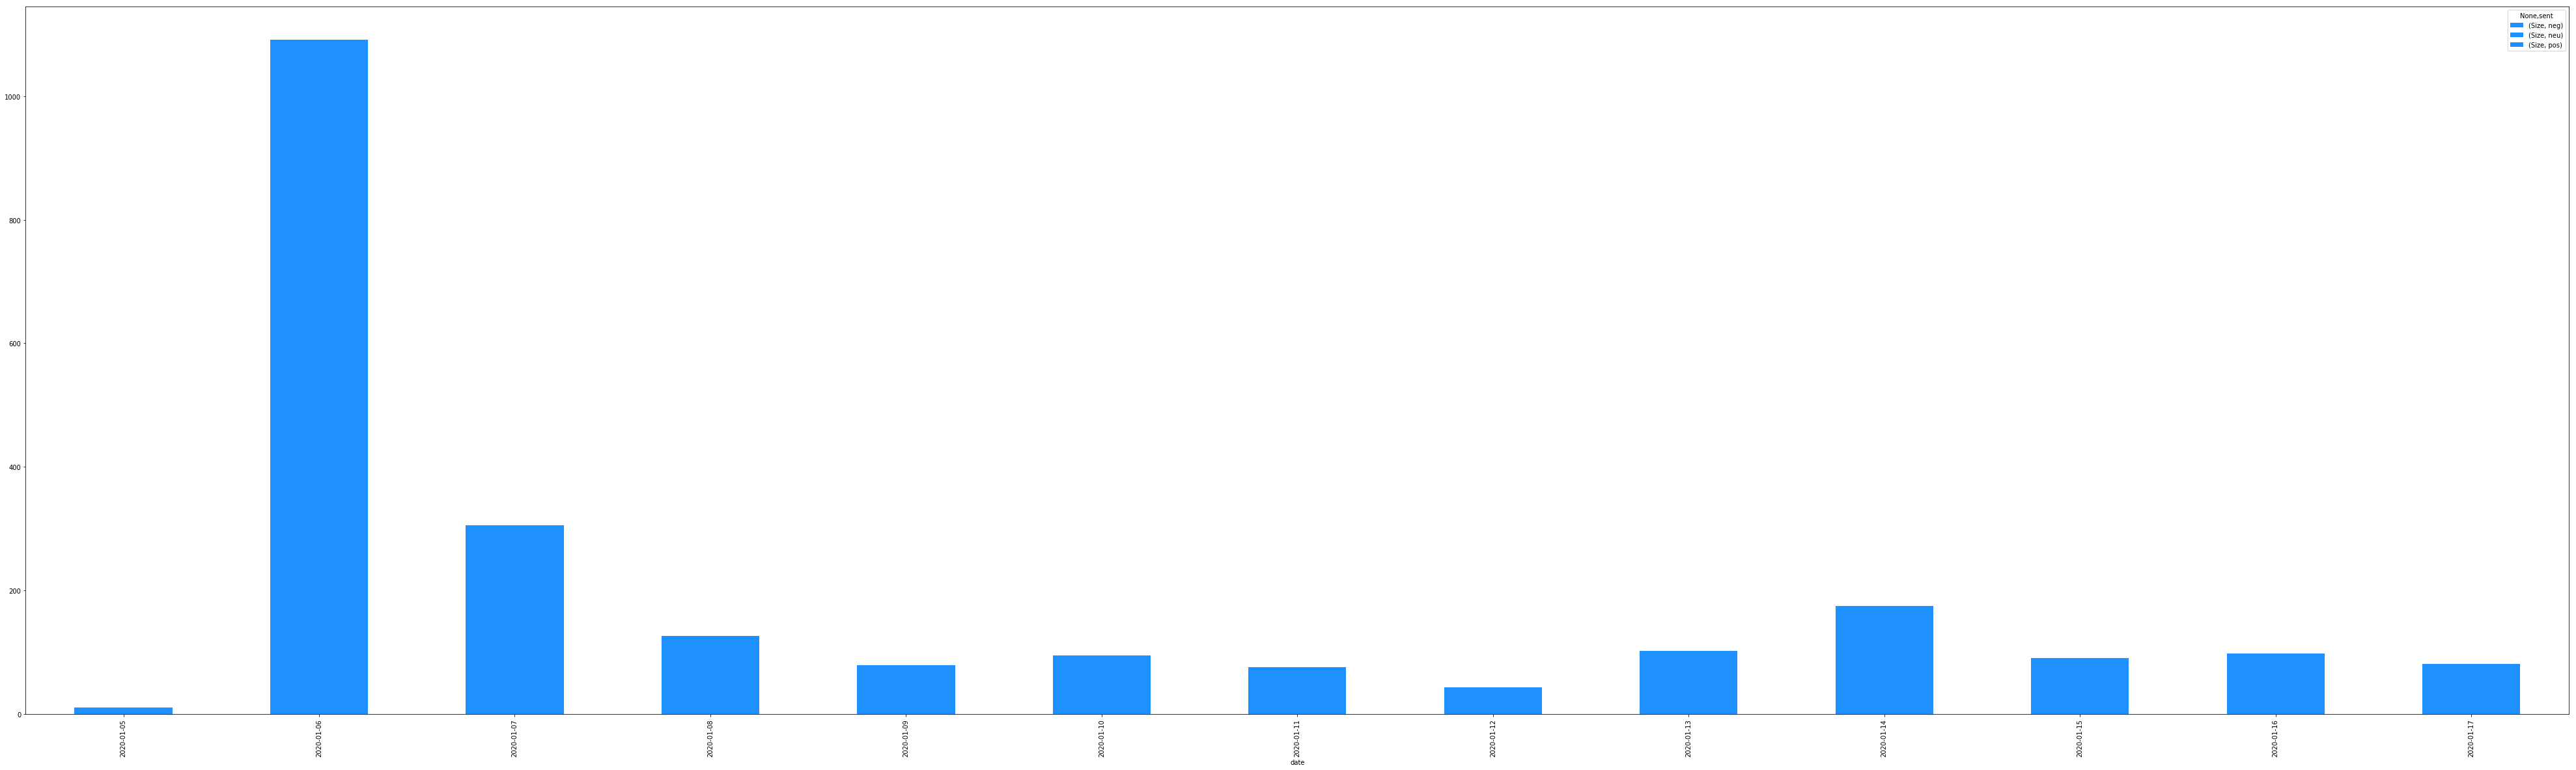

In [85]:
# plot the sentiment table
sent_day_cross.pivot_table(index='date',columns='sent').plot(figsize=(70, 20),kind='bar',color=('dodgerblue', 'dodgerblue', 'dodgerblue'),stacked=True)
plt.savefig('twitteraccount.png', dpi=300)